Activity 2.2
Decision Trees are another classifier that work slightly differently to the the models above. First, using the make_blobs function, build a decision tree and see the shape of the decision boundary - also try plotting the tree itself (how to do this is in the link above!). Then, use this model on the 3D data above and compare performance with the other models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

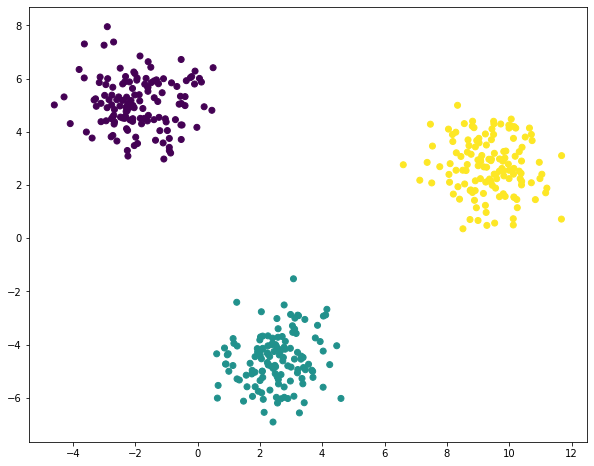

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=400, centers=3)
points = data[0]
labels = data[1]


fig, ax = plt.subplots(figsize=(10, 8))

# We need to index all the x points and all the y points respectively to get them
# plotted. Luckily we know how to do this using numpy indexing!

# (Take every row's 1st item)
x = points[:, 0]

# (Take every row's 2nd item)
y = points[:, 1]

ax.scatter(x, y, c=labels)

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Train test split
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2)

# Build and fit model
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# We won't always have the luxury of printing this, but let's try
print('Test values', y_test)
print('Predicted values', y_predict)

# We can see some differences. Let's get the F1 score.


Test values [0 1 0 1 2 0 2 2 0 1 0 2 0 0 0 2 0 1 0 2 2 1 2 2 0 2 1 0 1 0 2 2 1 2 2 1 1
 2 1 1 1 0 2 0 1 0 0 0 2 2 2 0 0 2 2 2 1 2 0 1 0 1 2 1 1 2 2 1 0 2 2 0 2 1
 0 1 2 1 1 1]
Predicted values [0 1 0 1 2 0 2 2 0 1 0 2 0 0 0 2 0 1 0 2 2 1 2 2 0 2 1 0 1 0 2 2 1 2 2 1 1
 2 1 1 1 0 2 0 1 0 0 0 2 2 2 0 0 2 2 2 1 2 0 1 0 1 2 1 1 2 2 1 0 2 2 0 2 1
 0 1 2 1 1 1]


In [4]:

from sklearn.model_selection import cross_val_score

print(cross_val_score(model,x_test, y_predict))

[1. 1. 1. 1. 1.]


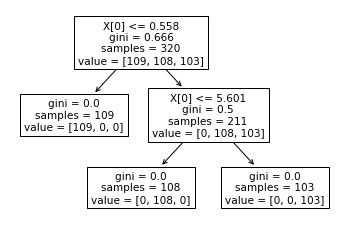

In [5]:
tree.plot_tree(model)
plt.show()


In [6]:
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
plot_step = 0.02  # fine step width for decision surface contours
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

In [7]:
#Building up the mesh for boundry division
Z = model.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

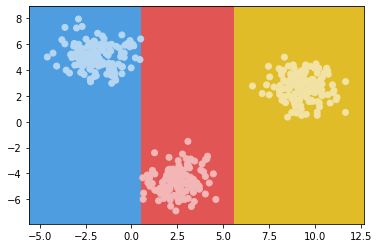

In [8]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#4D9DE0', '#E15554', '#E1BC29'])
cmap_bold = ListedColormap(['#B4D6F2', '#F2B6B6', '#F2E2A4'])

# Now plot

fig, ax = plt.subplots()

ax.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
ax.scatter(points[:, 0], points[:, 1], c=labels, cmap = cmap_bold)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

In [9]:
# Import the 3D data in 2.1.
data1 = pd.read_csv("project_training.csv")
print(data1.head())

   class      x data      y data     z data
0      0   80.543502   41.318858  33.818395
1      0   78.291164  127.006373  41.923430
2      0  121.484717  120.776238  74.294293
3      0   22.123624   70.748242 -17.645028
4      0   63.964959  113.604554  98.920726


In [10]:
data = data1.drop('class', axis=1).values
classes = data1['class'].values

# Unpack the train test splitted data. Test size = 0.2 = 20% of data is testing.
from sklearn.model_selection import train_test_split


In [11]:
# Train test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, labels, test_size=0.2)

# Build and fit model
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train1, y_train1)


y_predict1 = model1.predict(x_test1)

# We won't always have the luxury of printing this, but let's try
print('Test values', y_test1)
print('Predicted values', y_predict1)


Test values [1 0 0 0 1 0 1 2 1 2 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 2 2 2 1 1 0 0 1 1 0 1
 1 0 0 2 0 2 1 1 0 1 1 2 0 2 1 0 2 1 2 0 1 2 0 0 0 0 0 2 0 2 1 1 1 2 0 0 0
 2 0 0 2 0 0]
Predicted values [2 1 0 1 2 1 2 1 0 2 0 0 0 1 1 0 0 0 2 2 1 0 2 0 2 2 1 1 1 0 0 0 1 0 2 0 1
 0 1 2 2 0 0 0 2 0 0 2 2 1 0 1 1 1 2 2 1 2 1 2 0 0 0 0 1 0 0 1 0 0 2 2 0 2
 1 2 2 0 1 0]


In [12]:
print(cross_val_score(model,x_test1, y_predict1))

[0.3125 0.6875 0.375  0.625  0.1875]


In [ ]:
#I still need understand these metrics

In [ ]:
Again I spent an enormous amount of time trying to get the boundary sections plot to work for 3D,
but in the end I had to give up I would need to understand in more detail the dividing up
of the grid mesh and relating x, y and z
